In [27]:
# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,LSTM,Embedding
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils


In [28]:
# seed 값 설정
seed = 42
np.random.seed(seed)
tf.random.set_seed(42)

In [29]:
# train, test split
(x_train, y_train), (x_test, y_test) =reuters.load_data(num_words = 1000, test_split = 0.2)

In [30]:
y_train.shape

(8982,)

In [31]:
y_train[:5]

array([3, 4, 3, 4, 4])

In [32]:
# 데이터 확인
np.max(y_train)

45

In [33]:
category = np.max(y_train) + 1

In [34]:
print(category, '카테고리')
print(len(x_train), '학습용 뉴스 기사')
print(len(x_test),'테스트용 뉴스 기사')
print(x_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


Reuters 데이터는 빈도수에 따라 숫자를 매겨놓음
- ex) 2라면 2번째로 빈도가 높은 단어
- num_words = 100 : 1~ 100번까지의 빈도수가 높은 단어만 추출해서 학습시키겠다는 의미

데이터 전처리

In [51]:
sequence.pad_sequences(x_train, maxlen=100)
# maxlen = 100 : 단어 수를 최대 100개로 맞추라는 의미

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [ 19, 758,  15, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [ 88,   2,  72, ..., 364,  17,  12],
       [125,   2,  21, ..., 113,  17,  12]], dtype=int32)

In [36]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [37]:
maxlen=100

In [38]:
# x_train = sequence.pad_sequences(x_train, maxlen=100)
# x_test = sequence.pad_sequences(x_test, maxlen=100)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
# one-hot encording 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [39]:
x_train, x_test

(array([[  0,   0,   0, ...,  15,  17,  12],
        [  0,   0,   0, ..., 505,  17,  12],
        [ 19, 758,  15, ...,  11,  17,  12],
        ...,
        [  0,   0,   0, ..., 407,  17,  12],
        [ 88,   2,  72, ..., 364,  17,  12],
        [125,   2,  21, ..., 113,  17,  12]], dtype=int32),
 array([[  5,   2,   7, ..., 510,  17,  12],
        [652, 194,   2, ..., 760,  17,  12],
        [ 13,  10, 139, ...,   8,  17,  12],
        ...,
        [  0,   0,   0, ...,  11,  17,  12],
        [  0,   0,   0, ...,   8,  17,  12],
        [ 47, 758,  15, ...,   2,  17,  12]], dtype=int32))

In [40]:
y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

모델 설정

In [41]:
model = Sequential()
model.add(Embedding(1000, maxlen))
model.add(LSTM(maxlen, activation ='tanh'))       # LSTM : 하이퍼볼릭 탄젠트 함수 사용
model.add(Dense(category, activation='softmax')) # 다중분류

In [42]:
# 모델 컴파일

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [43]:
# 모델 실행

history = model.fit(x_train, y_train, batch_size=100,epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 26s 266ms/step - loss: 2.5334 - accuracy: 0.3889 - val_loss: 2.0805 - val_accuracy: 0.4987
Epoch 2/20
90/90 [==============================] - 25s 274ms/step - loss: 2.0249 - accuracy: 0.5032 - val_loss: 1.9732 - val_accuracy: 0.5249
Epoch 3/20
90/90 [==============================] - 29s 319ms/step - loss: 1.8831 - accuracy: 0.5357 - val_loss: 1.8136 - val_accuracy: 0.5570
Epoch 4/20
90/90 [==============================] - 22s 241ms/step - loss: 1.6979 - accuracy: 0.5671 - val_loss: 1.6733 - val_accuracy: 0.5797
Epoch 5/20
90/90 [==============================] - 26s 287ms/step - loss: 1.6092 - accuracy: 0.5882 - val_loss: 1.6362 - val_accuracy: 0.5922
Epoch 6/20
90/90 [==============================] - 24s 270ms/step - loss: 1.5148 - accuracy: 0.6158 - val_loss: 1.5621 - val_accuracy: 0.6046
Epoch 7/20
90/90 [==============================] - 25s 279ms/step - loss: 1.4187 - accuracy: 0.6329 - val_loss: 1.5215 - val_accuracy: 0.6207

In [47]:
# 테스트 정확도 출력
print('\n Test Acc : %.4f'%(model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 2s 24ms/step - loss: 1.2536 - accuracy: 0.7048

 Test Acc : 0.7048


In [48]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

In [49]:
# 학습용 셋의 오차
y_loss = history.history['loss']

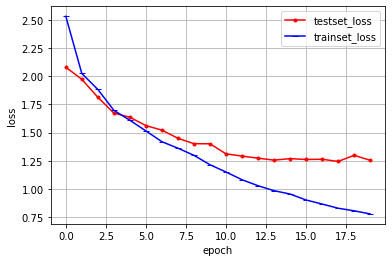

In [50]:
# 그래프로 표현

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss,marker = '.', c='red', label='testset_loss')
plt.plot(x_len, y_loss,marker = '_', c='blue', label='trainset_loss')

# 그리드 주고, 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
